# Introducció a la construcció de gràfics i mapes
Primers exercicis de construcció de mapes i gràfics. A continuació es mostra el codi creat i utilitzat per dur a terme la següent pràctica.

### Introducció a la creació de gràfics

Importació de les biblioteques

In [36]:
# import modules
import numpy as np
import matplotlib as mpl
from netCDF4 import Dataset as ncread
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline


Importació de l'arxiu de dades de temperatura i definició de totes les variables que s'utilitzaran.

In [33]:
data_path = "C:/Users/alumne/Desktop/Dades/"
nc = ncread(data_path+'e20C_Amon_tas_190001-201012.nc')
#Definir les variables
t = nc.variables['2T_GDS4_SFC'][:]
lon = nc.variables['g4_lon_2'][:]
lat = nc.variables['g4_lat_1'][:]
ni=len(lon)
ny=len(lat)
nyr=int(len(t[:,0,0])/12)


Reestructuració de la matriu de temperatura

In [34]:
t = np.reshape(t,(nyr,12,ny,ni))

#### Temperatura durant l'any 2002

Càlcul de la temperatura mitjana de cada mes.

In [35]:
t_j=t[102,:,:,:]-273.15#S'escull l'any 2002.
#t_g=np.mean(t_j,axis=0)#Mitjana en totes les latituds.
t_g=np.mean(t_j,axis=2)#Mitjana de tots els resultats anteriors i a graus centígrads.
coslat=np.cos(np.radians(lat))
suma=np.sum(coslat)
t_g_a=np.empty(12)
t_g_a.fill(np.nan)
for it in range(12):
    t_g_a[it]=np.sum(coslat[:]*t_g[it,:])/suma

Creació del gràfic

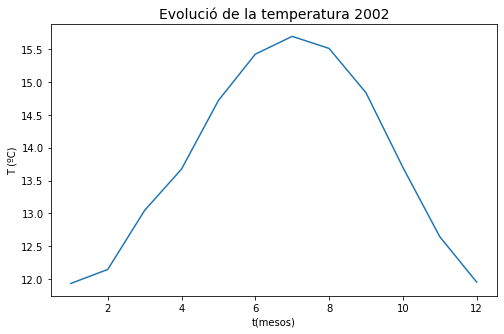

In [28]:
months=np.arange(12)+1
fig,ax1=plt.subplots(figsize=(8,5))
plt.plot(months,t_g_a)
plt.title('Evolució de la temperatura 2002',fontsize=14)
plt.xlabel('t(mesos)')
plt.ylabel('T (ºC)')
fig.savefig(data_path+'fig_i', bbox_inches='tight',dpi=400)

#### Comparació 2002-1900

Càlcul de la temperatura mitjana de cada mes i creació del gràfic.

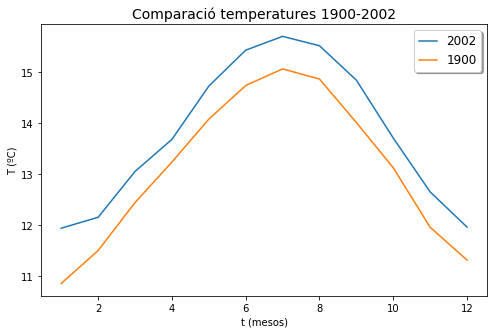

In [37]:
t_h=t[0,:,:,:]-273.15
t_i=np.mean(t_h,axis=2)
t_i_a=np.empty(12)
t_i_a.fill(np.nan)
for it in range(12):
    t_i_a[it]=np.sum(coslat[:]*t_i[it,:])/suma

fig,ax1=plt.subplots(figsize=(8,5))
plt.plot(months,t_g_a)
plt.plot(months,t_i_a)
plt.title('Comparació temperatures 1900-2002',fontsize=14)
plt.xlabel('t (mesos)')
plt.ylabel('T (ºC)')

plt.legend(('2002', '1900'),
           shadow=True, handlelength=1.5, fontsize=12)
fig.savefig(data_path+'fig_ii', bbox_inches='tight',dpi=400)

Càlcul de la diferència de temperatura mitjana de l'any 2002 respecte l'any 1900. 

In [38]:
t_i_a_a=np.nanmean(t_i_a, axis=0)
t_g_a_a=np.nanmean(t_g_a, axis=0)
t_gi_a_a=t_g_a_a-t_i_a_a
print('Difèrencia de temperatures mitjanes:',t_gi_a_a,'ºC')

Difèrencia de temperatures mitjanes: 0.6811817487080898 ºC


#### Representació per latituds

Visualització de totes les latituds de les quals se'n disposen dades.

In [9]:
print(lat)

[ 89.14152     88.02943     86.910774    85.79063     84.66992
  83.54895     82.42782     81.306595    80.18531     79.06398
  77.94263     76.82124     75.699844    74.57843     73.45701
  72.33558     71.214134    70.09269     68.97124     67.849785
  66.728325    65.606865    64.4854      63.363934    62.242462
  61.12099     59.99952     58.878044    57.75657     56.635094
  55.513615    54.392136    53.270657    52.149174    51.027695
  49.90621     48.78473     47.663246    46.541763    45.42028
  44.298794    43.17731     42.055824    40.934338    39.81285
  38.691364    37.56988     36.44839     35.326904    34.205418
  33.08393     31.962444    30.840956    29.719467    28.597979
  27.47649     26.355003    25.233515    24.112024    22.990536
  21.869047    20.747559    19.62607     18.50458     17.383091
  16.2616      15.140112    14.018622    12.897133    11.775643
  10.654153     9.532663     8.411174     7.2896843    6.1681943
   5.0467043    3.9252145    2.8037248    1.

Definició de les variables que correspondran a les latituds de l'hemisferi nord i les de l'hemisferi sud.

In [13]:
l90s = (np.abs(lat+90)).argmin()#La variable agafa el valor de la latitud que més s'acosti a -45.(Hemisferi sud) 
l1s = (np.abs(lat+1)).argmin()
l1n = (np.abs(lat-1)).argmin()#El mateix però a l'hemisferi nord.
l90n = (np.abs(lat-90)).argmin()#El mateix però a l'hemisferi nord.
latn=lat[l90n:l1n]
lats=lat[l1s:l90s]

Càlcul de les temperatures mitjanes mensuals de l'any 1986 a l'hemisferi nord.

In [11]:
t_m=t[86,:,l90n:l1n,:]-273.15 #Definir la zona i l'any que volem.
t_m_a=np.mean(t_m,axis=2)
t_m_a_a=np.empty(12)
t_m_a_a.fill(np.nan)
coslatn=np.cos(np.radians(latn))
suman=np.sum(coslatn)
for it in range(12):
    t_m_a_a[it]=np.sum(coslatn[:]*t_m_a[it,:])/suman



Càlcul de les temperatures mitjanes mensuals de l'any 1986 a l'hemisferi sud i representació dels resultats.

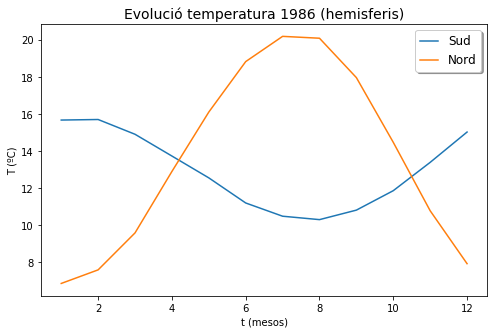

In [12]:
t_n=t[86,:,l1s:l90s,:]#Definir la zona i l'any que volem.
t_n_a=np.mean(t_n,axis=2)-273.15#Càlcul de la mitjana de totes les latituds.
t_n_a_a=np.empty(12)
t_n_a_a.fill(np.nan)
coslats=np.cos(np.radians(lats))
sumas=np.sum(coslats)
for it in range(12):
    t_n_a_a[it]=np.sum(coslats[:]*t_n_a[it,:])/sumas

#Representar les dades:
fig,ax1=plt.subplots(figsize=(8,5))
plt.plot(months,t_n_a_a)
plt.plot(months,t_m_a_a)
plt.title('Evolució temperatura 1986 (hemisferis)',fontsize=14)
plt.xlabel('t (mesos)')
plt.ylabel('T (ºC)')
plt.legend(('Sud', 'Nord'),
           shadow=True, handlelength=1.5, fontsize=12)
fig.savefig(data_path+'fig_iii', bbox_inches='tight',dpi=400)

### Càlcul d'anomalies

Càlcul de les anomalies segons la formula explicada al treball.

In [7]:
t_anom=np.zeros((111,12,ny,ni))#Construcció d'una matriu amb les mateixes dimensions de t. La matriu només conté zeros.
t_anom.fill(np.nan)#Omplir l'array de "NaNs".
clim=np.nanmean(t,axis=0)#Fa la mitjana de temperatura de tots els anys tenint en compte tots els mesos, longituds i latituds.
for iyr in range(nyr):#En aquest bucle apliquem la formula explicada anteriorment. El bucle es repetirà tantes vegades com el nombre d'anys (111).
       for imon in range(12):#En cada bucle es repetirà 12 vegades la fómula explicada.
        t_anom[iyr,imon,:,:]=t[iyr,imon,:,:]-clim[imon,:,:]#Execució de la fórmula

Càlcul de les anomalies entre 1900 i 2010.

In [40]:
t_anom_a=np.nanmean(t_anom,axis=3)#mitjana de les longituds.
t_anom_a_a=np.empty((111,12,))
t_anom_a_a.fill(np.nan)
for it in range(111):
     for imon in range(12):
        t_anom_a_a[it,imon]=np.sum(coslat[:]*t_anom_a[it,imon,:])/suma

t_anom_a_b=np.nanmean(t_anom_a_a, axis=1)

Visualització dels resultats.

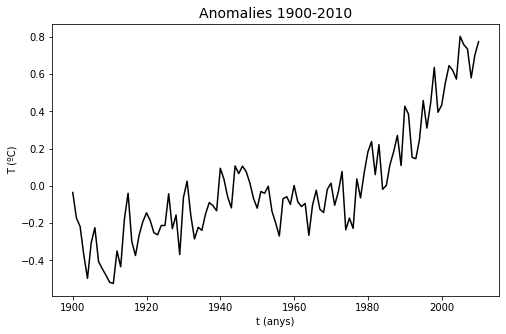

In [41]:
fig,ax1=plt.subplots(figsize=(8,5))
plt.plot(years,t_anom_a_b, color='k')
plt.title('Anomalies 1900-2010',fontsize=14)
plt.xlabel('t (anys)')
plt.ylabel('T (ºC)')

fig.savefig(data_path+'fig_19', bbox_inches='tight',dpi=400)

#### Visualització d'anomalies en mapes 

Càlcul de les anomalies mitjanes de l'any 2010.

In [46]:
t_anom_b=t_anom[110,:,:,:]
t_anom_b_a=np.nanmean(t_anom_b,axis=0)
var=t_anom_b_a

Creació del mapa

c:\users\alumne\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
c:\users\alumne\anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app


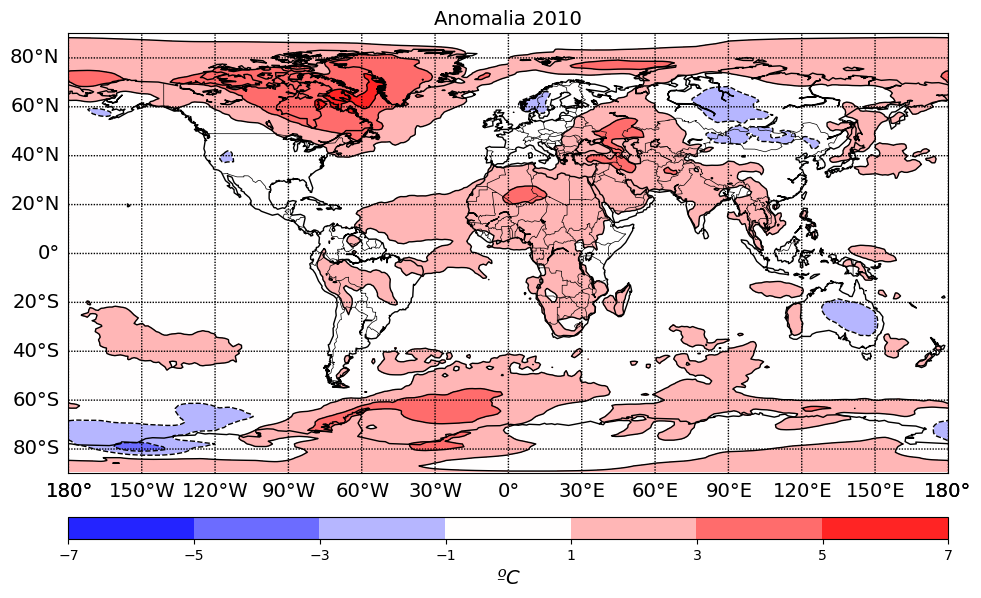

In [13]:

dpi = 101

fig = plt.figure(figsize=(1100/dpi, 1100/dpi), dpi=dpi)
ax = fig.add_axes([0.1,0.1,0.8,0.9])

#----Creació del mapa
map = Basemap(projection='cyl',llcrnrlat= -90.,urcrnrlat= 90.,\
resolution='c', llcrnrlon=-180.,urcrnrlon=180.,lon_0=0.,
lat_0=0.,)

#----Dibuixar les costes, estats, països...
map.drawcoastlines()
#map.drawstates()
#map.fillcontinents()
map.drawcountries(zorder=100)

#----Dibuixar paral·lels i meridians
map.drawparallels(np.arange( -80., 90.,20.),labels=[1,0,0,0],fontsize=14)
map.drawmeridians(np.arange(-180,180.,30.),labels=[0,0,0,1],fontsize=14)

#----*DEFINIR LES COORDENADES X I Y DEL MAPA COM A LES LONGITUDS I LES LATITUDS DE L'ARXIU DE DADES.
x, y = map(*np.meshgrid(lon,lat))
x1, y1 = map(*np.meshgrid(lon-359,lat))
#-- contour levels
#clevs = np.arange(-2,2,.2)*1e7
#clevs=np.arange(13)*2-12
clevs=np.arange(8)*2-7

#----**PINTAR ELS MAPES
cnplot = map.contourf(x1,y1,var,cmap=plt.cm.bwr,levels=clevs)
cnplot = map.contourf(x,y,var,cmap=plt.cm.bwr,levels=clevs)
cs2 = map.contour(x1, y1, var, (0,), colors = 'k', linewidths = 1,levels=clevs)
cs2 = map.contour(x, y, var, (0,), colors = 'k', linewidths = 1,levels=clevs)
#cs2 = map.contour(x, y, var, colors = 'k', linewidths = 1,levels=clevs)
#plt.clabel(cs2, fmt = '%d', colors = 'C',fontsize=12)
#cnplot = map.contourf(x,y,var,cmap=plt.cm.coolwarm)

#----Creació d'una barra de colors
cbar = map.colorbar(cnplot,location='bottom',pad="10%") #-- pad: distància entre el mapa i la barra de colors
cbar.set_label('$ºC$',fontsize=14) #-- Títol de la barra de colors


#----Títol
#plt.title('2000-2010 minus 1900-1910',fontsize=14)
plt.title('Anomalia 2010',fontsize=14)
plt.plot(years, t_anom_a_a[:,0], color='k')
fig.savefig(data_path+'fig_20', bbox_inches='tight',dpi=400)

In [50]:
max_2010=np.amax(var)
print('Anomalia màxima:',max_2010,'ºC')

Anomalia màxima: 6.624153137207031 ºC


In [51]:
min_2010=np.amin(var)
print('Anomalia mínima:',min_2010,'ºC')

Anomalia mínima: -4.01034418741862 ºC


#### Visualització de "el Niño"

Definició de l'anomalia que es mostrarà.

In [52]:
t_nino=t_anom[97,11,:,:]
var=t_nino

Creació del mapa i visualització.

c:\users\alumne\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
c:\users\alumne\anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


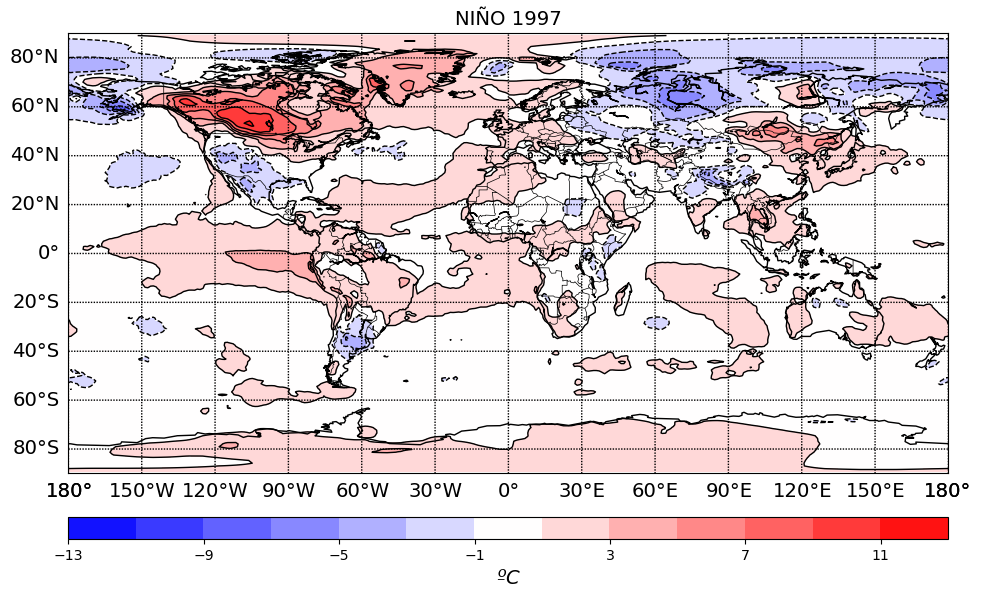

In [53]:
dpi = 101
fig = plt.figure(figsize=(1100/dpi, 1100/dpi), dpi=dpi)
ax = fig.add_axes([0.1,0.1,0.8,0.9])

#----Creació del mapa
map = Basemap(projection='cyl',llcrnrlat= -90.,urcrnrlat= 90.,\
resolution='c', llcrnrlon=-180.,urcrnrlon=180.,lon_0=0.,
lat_0=0.,)

#----Dibuixar les costes, estats, països...
map.drawcoastlines()
#map.drawstates()
#map.fillcontinents()
map.drawcountries(zorder=100)

#----Dibuixar paral·lels i meridians
map.drawparallels(np.arange( -80., 90.,20.),labels=[1,0,0,0],fontsize=14)
map.drawmeridians(np.arange(-180,180.,30.),labels=[0,0,0,1],fontsize=14)

#----*DEFINIR LES COORDENADES X I Y DEL MAPA COM A LES LONGITUDS I LES LATITUDS DE L'ARXIU DE DADES.
x, y = map(*np.meshgrid(lon,lat))
x1, y1 = map(*np.meshgrid(lon-359,lat))
#-- contour levels
#clevs = np.arange(-2,2,.2)*1e7
#clevs=np.arange(13)*2-12
clevs=np.arange(14)*2-13

#----**PINTAR ELS MAPES
cnplot = map.contourf(x1,y1,var,cmap=plt.cm.bwr,levels=clevs)
cnplot = map.contourf(x,y,var,cmap=plt.cm.bwr,levels=clevs)
cs2 = map.contour(x1, y1, var, (0,), colors = 'k', linewidths = 1,levels=clevs)
cs2 = map.contour(x, y, var, (0,), colors = 'k', linewidths = 1,levels=clevs)
#cs2 = map.contour(x, y, var, colors = 'k', linewidths = 1,levels=clevs)
#plt.clabel(cs2, fmt = '%d', colors = 'C',fontsize=12)
#cnplot = map.contourf(x,y,var,cmap=plt.cm.coolwarm)

#----Creació d'una barra de colors
cbar = map.colorbar(cnplot,location='bottom',pad="10%") #-- pad: distància entre el mapa i la barra de colors
cbar.set_label('$ºC$',fontsize=14) #-- Títol de la barra de colors


#----Títol
#plt.title('2000-2010 minus 1900-1910',fontsize=14)
plt.title('NIÑO 1997',fontsize=14)
fig.savefig(data_path+'fig_21', bbox_inches='tight',dpi=400)

### Càlcul de la diferència de temperatura entre 1900-1909 i 2001-2010

Definició de les variables

In [ ]:
t_j_i=t[0:10,:,:,:]
t_j_i=np.mean(t_j_i,axis=1)
t_j_i=np.mean(t_j_i,axis=0)

t_j_f=t[102:112,:,:,:]
t_j_f=np.mean(t_j_f,axis=1)
t_j_f=np.mean(t_j_f,axis=0)

dif= t_j_f - t_j_i

Representació en el mapa

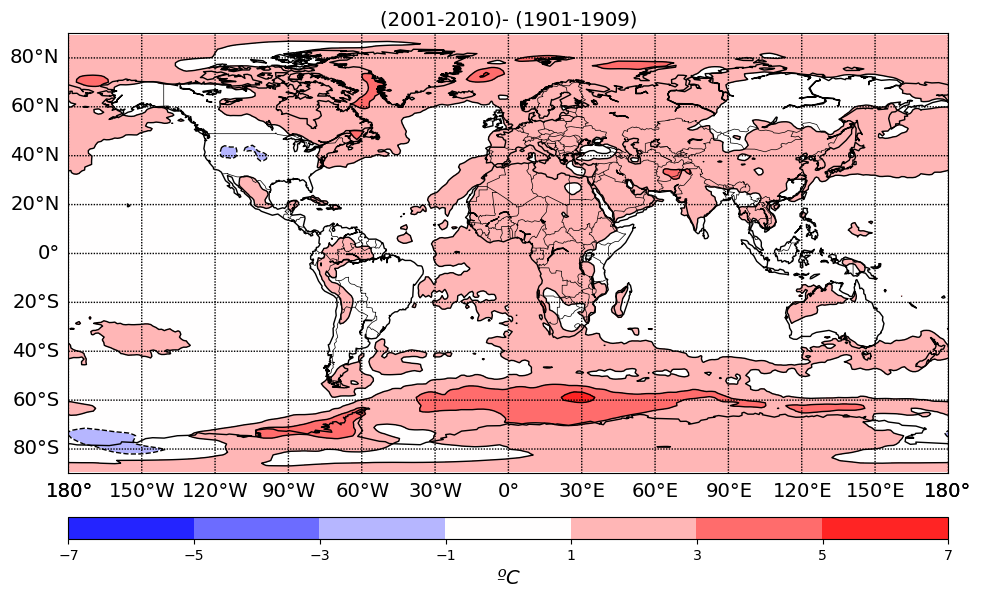

In [9]:

#----Definim la variable que volem representar.
var=dif

dpi = 101
fig = plt.figure(figsize=(1100/dpi, 1100/dpi), dpi=dpi)
ax = fig.add_axes([0.1,0.1,0.8,0.9])

#----Creació del mapa
map = Basemap(projection='cyl',llcrnrlat= -90.,urcrnrlat= 90.,\
resolution='c', llcrnrlon=-180.,urcrnrlon=180.,lon_0=0.,
lat_0=0.,)

#----Dibuixar les costes, estats, països...
map.drawcoastlines()
#map.drawstates()
#map.fillcontinents()
map.drawcountries(zorder=100)

#----Dibuixar paral·lels i meridians
map.drawparallels(np.arange( -80., 90.,20.),labels=[1,0,0,0],fontsize=14)
map.drawmeridians(np.arange(-180,180.,30.),labels=[0,0,0,1],fontsize=14)

#----DEFINIR LES COORDENADES X I Y DEL MAPA COM A LES LONGITUDS I LES LATITUDS DE L'ARXIU DE DADES.
x, y = map(*np.meshgrid(lon,lat))
x1, y1 = map(*np.meshgrid(lon-359,lat))
#-- contour levels
#clevs = np.arange(-15,15,.2)*2
#clevs=np.arange(13)*2-12
clevs=np.arange(8)*2-7


#----PINTAR ELS MAPES
cnplot = map.contourf(x1,y1,var,cmap=plt.cm.bwr,levels=clevs)
cnplot = map.contourf(x,y,var,cmap=plt.cm.bwr,levels=clevs)
cs2 = map.contour(x1, y1, var, (0,), colors = 'k', linewidths = 1,levels=clevs)
cs2 = map.contour(x, y, var, (0,), colors = 'k', linewidths = 1,levels=clevs)
#cs2 = map.contour(x, y, var, colors = 'k', linewidths = 1,levels=clevs)
#plt.clabel(cs2, fmt = '%d', colors = 'C',fontsize=12)
#cnplot = map.contourf(x,y,var,cmap=plt.cm.coolwarm)

#----Creació d'una barra de colors
cbar = map.colorbar(cnplot,location='bottom',pad="10%") #-- pad: distància entre el mapa i la barra de colors
cbar.set_label('$ºC$',fontsize=14) #-- Títol de la barra de colors


#----Títol
plt.title('(2001-2010)- (1901-1909)',fontsize=14)
fig.savefig(data_path+'fig_22', bbox_inches='tight',dpi=400)


Visualització de l'anomalia màxima i mínima.

In [55]:
print('Diferència màxima:',np.max(dif),'ºC')
print('Diferència mínima:',np.min(dif),'ºC')

Diferència màxima: 5.6873474 ºC
Diferència mínima: -1.776947 ºC


Anomalies mitjanes a cada hemisferi.

In [23]:
difn=dif[l90n:l1n,:]
difn=np.nanmean(difn, axis=1)
coslatn=np.cos(np.radians(latn))
suman=np.sum(coslatn)
difn=np.sum(coslatn[:]*difn[:])/suman
print('Diferència hemisfèri Nord:',difn,'ºC')


Diferència hemisfèri Nord: 1.0698409 ºC


In [24]:
difs=dif[l1s:l90s,:]
difs=np.nanmean(difs, axis=1)
coslats=np.cos(np.radians(lats))
sumas=np.sum(coslats)
difs=np.sum(coslats[:]*difs[:])/sumas
print('Diferència hemisfèri Sud:',difs,'ºC')

Diferència hemisfèri Sud: 0.943146 ºC


#### Gràfics per analitzar els mapes

Creació del gràfic de les anomalies de tot el planeta.

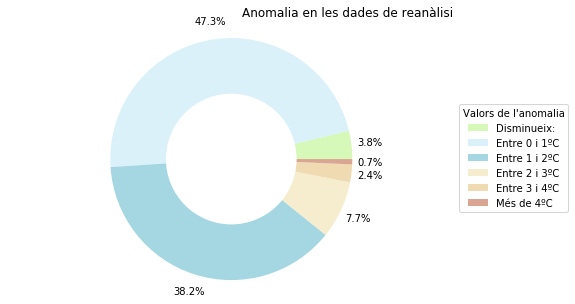

In [60]:
aug0=0
aug1=0
aug2=0
aug3=0
aug4=0
aug5=0
dis=0
for ilat in range(160):
    for ilon in range(320):
        if dif[ilat,ilon]<0:
            dis=dis+1
            
        if 1>dif[ilat,ilon]>0:
            aug0=aug0+1
            
        if 2>dif[ilat,ilon]>=1:
            aug1=aug1+1
            
        if 3>dif[ilat,ilon]>=2:
            aug2=aug2+1
            
        if 4>dif[ilat,ilon]>=3:
            aug3=aug3+1
            
        if dif[ilat,ilon]>=4:
            aug4=aug4+1

            

dis=dis*100/51200                
aug0=aug0*100/51200
aug1=aug1*100/51200
aug2=aug2*100/51200
aug3=aug3*100/51200
aug4=aug4*100/51200


total=dis+aug0+aug1+aug2+aug3+aug4
labels = 'Disminueix:', 'Entre 0 i 1ºC','Entre 1 i 2ºC', 'Entre 2 i 3ºC','Entre 3 i 4ºC', 'Més de 4ºC'
sizes = [dis, aug0, aug1, aug2, aug3, aug4,]

colors = ['#d6f8b8','#daf1f9','#a4d7e1','#f6edcf','#f0dab1','#daa592',]
fig1, ax1 = plt.subplots(figsize=(8,5))
plt.pie(sizes, explode=None, labels=None, autopct='%1.1f%%',
        shadow=None, startangle=0, pctdistance=1.15, radius=5,colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend(labels,
          title="Valors de l'anomalia",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

#draw circle
centre_circle = plt.Circle((0,0),2.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Anomalia en les dades de reanàlisi",
         loc='right')


plt.show()
fig.savefig(data_path+'fig_23', bbox_inches='tight',dpi=400)


Creació dels gràfics d'anomalies per hemisferis.

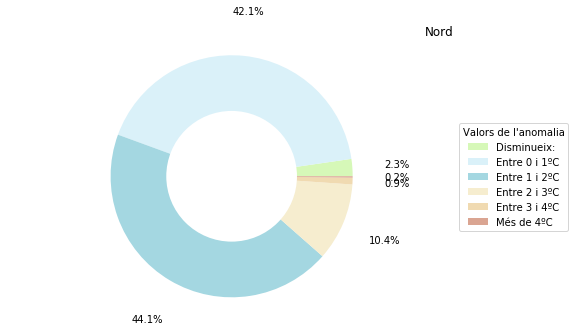

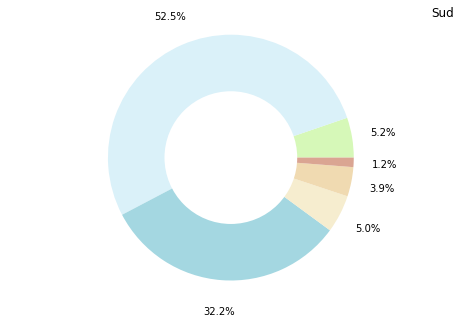

In [59]:
aug0n=0
aug1n=0
aug2n=0
aug3n=0
aug4n=0
disn=0
for ilat in range(80):
    for ilon in range(320):
        if dif[ilat,ilon]<0:
            disn=disn+1
            
        if 1>dif[ilat,ilon]>0:
            aug0n=aug0n+1
            
        if 2>dif[ilat,ilon]>=1:
            aug1n=aug1n+1
            
        if 3>dif[ilat,ilon]>=2:
            aug2n=aug2n+1
            
        if 4>dif[ilat,ilon]>=3:
            aug3n=aug3n+1
            
        if dif[ilat,ilon]>=4:
            aug4n=aug4n+1

            

disn=disn*100/25600                
aug0n=aug0n*100/25600
aug1n=aug1n*100/25600
aug2n=aug2n*100/25600
aug3n=aug3n*100/25600
aug4n=aug4n*100/25600


total=disn+aug0n+aug1n+aug2n+aug3n+aug4n
labels = 'Disminueix:', 'Entre 0 i 1ºC','Entre 1 i 2ºC', 'Entre 2 i 3ºC','Entre 3 i 4ºC', 'Més de 4ºC'
sizes = [disn, aug0n, aug1n, aug2n, aug3n, aug4n,]


fig1, ax1 = plt.subplots(figsize=(8,5))
plt.pie(sizes, explode=None, labels=None, autopct='%1.1f%%',
        shadow=None, startangle=0, pctdistance=1.37, radius=5,colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend(labels,
          title="Valors de l'anomalia",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

#draw circle
centre_circle = plt.Circle((0,0),2.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Nord",
         loc='right')
fig.savefig(data_path+'fig_24b', bbox_inches='tight',dpi=400)

aug0s=0
aug1s=0
aug2s=0
aug3s=0
aug4s=0
diss=0
for ilat in range(80):
    for ilon in range(320):
        if dif[ilat+80,ilon]<0:
            diss=diss+1
            
        if 1>dif[ilat+80,ilon]>0:
            aug0s=aug0s+1
            
        if 2>dif[ilat+80,ilon]>=1:
            aug1s=aug1s+1
            
        if 3>dif[ilat+80,ilon]>=2:
            aug2s=aug2s+1
            
        if 4>dif[ilat+80,ilon]>=3:
            aug3s=aug3s+1
            
        if dif[ilat+80,ilon]>=4:
            aug4s=aug4s+1

            

diss=diss*100/25600                
aug0s=aug0s*100/25600
aug1s=aug1s*100/25600
aug2s=aug2s*100/25600
aug3s=aug3s*100/25600
aug4s=aug4s*100/25600


total=diss+aug0s+aug1s+aug2s+aug3s+aug4s
labels = 'Disminueix:', 'Entre 0 i 1ºC','Entre 1 i 2ºC', 'Entre 2 i 3ºC','Entre 3 i 4ºC', 'Més de 4ºC'
sizes = [diss, aug0s, aug1s, aug2s, aug3s, aug4s,]


fig1, ax1 = plt.subplots(figsize=(8,5))
plt.pie(sizes, explode=None, labels=None, autopct='%1.1f%%',
        shadow=None, startangle=0, pctdistance=1.25, radius=5,colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.



#draw circle
centre_circle = plt.Circle((0,0),2.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Sud",
         loc='right')

plt.show()
fig.savefig(data_path+'fig_24a', bbox_inches='tight',dpi=400)